In [1]:
# 라이브러리 불러오기   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# 데이터 불러오기
noc_region = pd.read_csv('./Data/noc_regions.csv')
athlete_events = pd.read_csv('./Data/athlete_events.csv')

In [2]:
#초기 데이터셋 탐색

# noc_region의 열과 행의 갯수 확인
print(noc_region.shape)

# ahtlete_events의 열과 행의 갯수 확인
print(athlete_events.shape)

# noc_region의 상위 5개 데이터 확인
print(noc_region.head())

# athlete_events의 상위 5개 데이터 확인
print(athlete_events.head())


(230, 3)
(271116, 15)
   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  190

In [3]:
# 데이터 병합 outer join
all_data = pd.merge(athlete_events, noc_region, how='outer', on='NOC')

# 병합된 데이터 확인
print(all_data.head())

# all_data의 noc와 noc_region의 noc의 항목명 차집합 확인
print(set(all_data['NOC']) - set(noc_region['NOC']))

# 싱가포르의 NOC가 서로 다름을 확인함.

# athlete_events의 NOC 열의 SGP를 SIN으로 변경
athlete_events['NOC'] = athlete_events['NOC'].replace('SGP', 'SIN')

# 데이터 새로 병합해서 all_data에 저장
all_data = pd.merge(athlete_events, noc_region)

# region, notes 열 대문자로 변경
all_data.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

       ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1.0      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2.0       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602.0  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463.0      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464.0      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

     Year  Season            City       Sport  \
0  1992.0  Summer       Barcelona  Basketball   
1  2012.0  Summer          London        Judo   
2  2000.0  Summer          Sydney      Boxing   
3  2004.0  Summer          Athina   Wrestling   
4  2016.0  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Midd

In [4]:
# 중복치 갯수 확인
print(all_data.duplicated().sum())

# 중복치가 어디서 발생하는지 확인
print(all_data[all_data.duplicated()])

# 5540 부터 5543 행 자세히 출력
print(all_data[5540:5545])

# 중복치 제거
all_data = all_data.drop_duplicates()

# 중복치 제거 확인
print(f"total duplicates : {all_data.duplicated().sum()}")

1385
            ID                                  Name Sex   Age  Height  \
5478     12948                 Thyra Valborg Boldsen   F  48.0     NaN   
5540     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5541     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5542     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
5543     18252  Anne Marie Carl-Nielsen (Brodersen-)   F  69.0     NaN   
...        ...                                   ...  ..   ...     ...   
249409  127869              Adolf Wagner von der Mhl   M  44.0     NaN   
259208   23363                            Frane Cota   M  25.0     NaN   
259986   64240                              F. Kroly   M   NaN     NaN   
260363   85115                      Franjo Neidhardt   M   NaN     NaN   
261198  122725                       Vladimir Turina   M  35.0     NaN   

        Weight        Team  NOC        Games  Year  Season         City  \
5478       NaN     Denmark  DEN

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
Region        21
Notes     264696
dtype: int64
            ID                Name Sex   Age  Height  Weight     Team  NOC  \
0            1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1            2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
2          602       Abudoureheman   M  22.0   182.0    75.0    China  CHN   
3         1463           Ai Linuer   M  25.0   160.0    62.0    China  CHN   
4         1464           Ai Yanhan   F  14.0   168.0    54.0    China  CHN   
...        ...                 ...  ..   ...     ...     ...      ...  ...   
271111  120575     Mamorallo Tjoka   F  23.0   150.0    56.0  Lesotho  LES   
271112  120575     Mamorallo Tjoka   F  27.0   150.0    56.0  Lesotho  LES

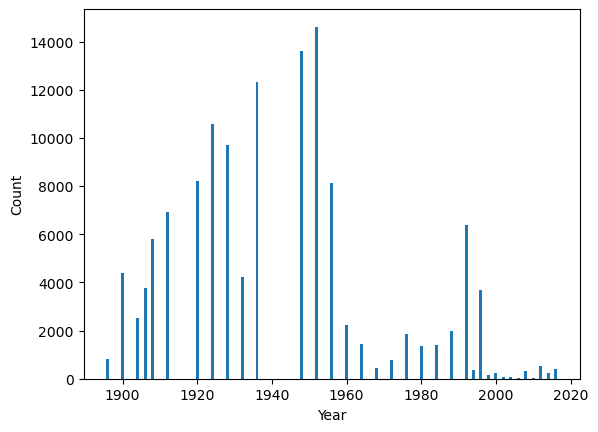

In [5]:
# 결측치 확인
print(all_data.isnull().sum())

# 결측치 있는 행들 확인
print(all_data[all_data.isnull().any(axis=1)])

# Region 결측치 확인
print(all_data[all_data['Region'].isnull()])

# Region 결측치 Team과 동일하게 채워넣기
all_data['Region'] = all_data['Region'].fillna(all_data['Team'])

# Medal 결측치 'No medal'로 채워넣기
all_data['Medal'] = all_data['Medal'].fillna('No medal')

# Notes 결측치 'No notes'로 채워넣기
all_data['Notes'] = all_data['Notes'].fillna('No notes')

# 각 행의 결측치 수를 확인하고 'miss_data' 열로 추가
all_data["miss_data"] = all_data.isnull().sum(axis=1)

# 년도별 결측치 총합 계산 후 내림차순 정렬
n_miss_data = all_data.groupby('Year')['miss_data'].sum().sort_values(ascending=False)

# 시각화
plt.bar(n_miss_data.index, n_miss_data.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


보다시피 결측치가 상당히 많음.
60년대 이전으로 많이 분포하고 있는데.
이를 버릴 수가 없었음. 중요한 데이터이기 때문에.
그리고 아예 비워져있는게 아니라 일부 데이터가 없는 것이라.
채워주면 된다고 생각함.
결측치를 채워줄 때, 옵션이 아래와 같았음.

중간값 혹은 평균값 대체
단점 =
회귀 대체
단점 = 선형적 표현으로 다양한 측면 고려가 어려움.
KNN
장점 = 데이터가 많고 또 비선형적인 패턴을 찾을 수 있기에 해당 문제를 해결하기에 최적의 옵션이라고 생각함.
  
결론적으로 KNN으로 결측치를 대체하기로함.
키, 몸무게, 나이끼리의 상관관계 뿐만 아니라. 국가와 종목까지 고려하여서.
이웃 최근접 값을 찾아 주었음.

물론 어디까지나 없는 값을 채워주는 것이기에.이것이 정확하다고 볼 수는 없을 것임.
그래도. 단순히 중간값으로 채워주는 것 보다는 좀 더 다채로운 특징을 살려준 채로 채우는거라.
차후 분석시에 조금 더 정확한 분석이 나올 것으로 예상되었음.

K값을 10으로 두어서 계산했고 약 13분 소요됨
K값이란, 결측치를 중심으로 인접한 속성 값을 몇 개까지 볼 것인가를 뜻함.

결과는 아래와 같음.
X축은 각각 나이, 몸무게, 키 이고, Y축은 연도로 설정하여 분포도를 나타냄

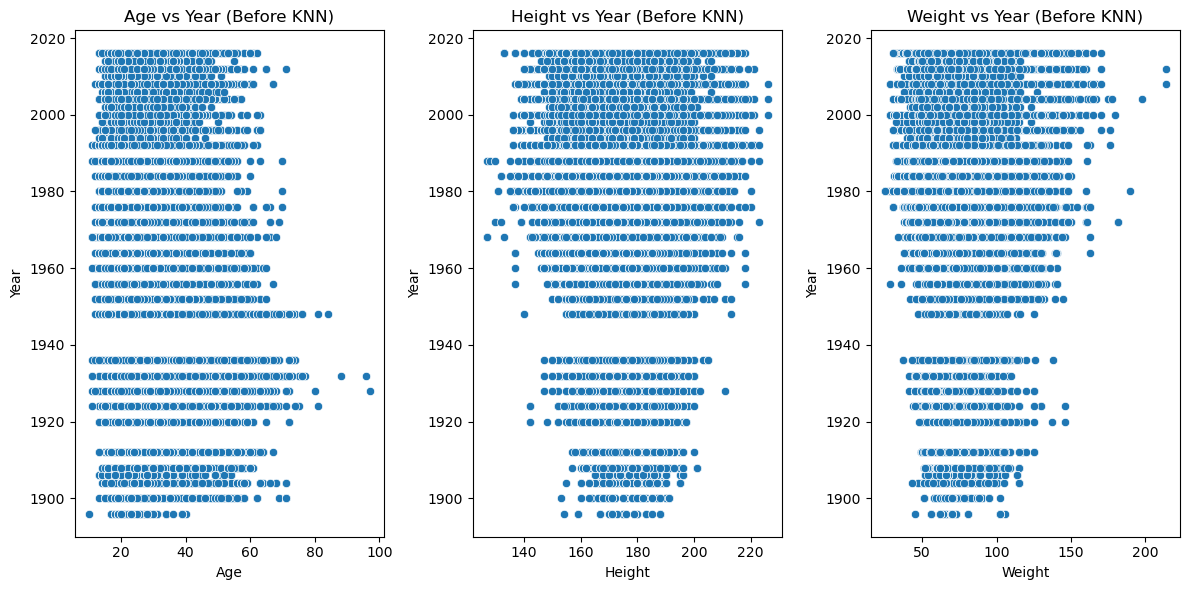

In [6]:
import missingno as msno
import matplotlib.pyplot as plt

# KNN 적용 전 분포도 시각화
plt.figure(figsize=(12, 6))

# Age vs Year 분포도
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Year', data=all_data)
plt.title('Age vs Year (Before KNN)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Year', data=all_data)
plt.title('Height vs Year (Before KNN)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Year', data=all_data)
plt.title('Weight vs Year (Before KNN)')

plt.tight_layout()
plt.show()

# KNN모델 반영 전 결측치 추적
all_data['Age_was_missing'] = all_data['Age'].isnull()
all_data['Height_was_missing'] = all_data['Height'].isnull()
all_data['Weight_was_missing'] = all_data['Weight'].isnull()

In [7]:
# KNN Imputer 적용 코드
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# 'NOC' 열과 'Sport' 열을 Label Encoding으로 수치형 변환
le_noc = LabelEncoder()
all_data['NOC_encoded'] = le_noc.fit_transform(all_data['NOC'])

le_sport = LabelEncoder()
all_data['Sport_encoded'] = le_sport.fit_transform(all_data['Sport'])

# KNN을 적용할 열 목록 (국가와 종목 포함)
columns_to_impute = ['Age', 'Height', 'Weight', 'Sport_encoded', 'NOC_encoded']

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
all_data[columns_to_impute] = scaler.fit_transform(all_data[columns_to_impute])

# KNNImputer로 결측치 대체
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

# 스케일링을 원래대로 되돌림
all_data[columns_to_impute] = scaler.inverse_transform(all_data[columns_to_impute])

# 결측치가 잘 채워졌는지 확인
print(all_data.isnull().sum())
columns_to_impute = ['Age', 'Height', 'Weight']
imputer = KNNImputer(n_neighbors=10)
all_data[columns_to_impute] = imputer.fit_transform(all_data[columns_to_impute])

ID                    0
Name                  0
Sex                   0
Age                   0
Height                0
Weight                0
Team                  0
NOC                   0
Games                 0
Year                  0
Season                0
City                  0
Sport                 0
Event                 0
Medal                 0
Region                0
Notes                 0
miss_data             0
Age_was_missing       0
Height_was_missing    0
Weight_was_missing    0
NOC_encoded           0
Sport_encoded         0
dtype: int64


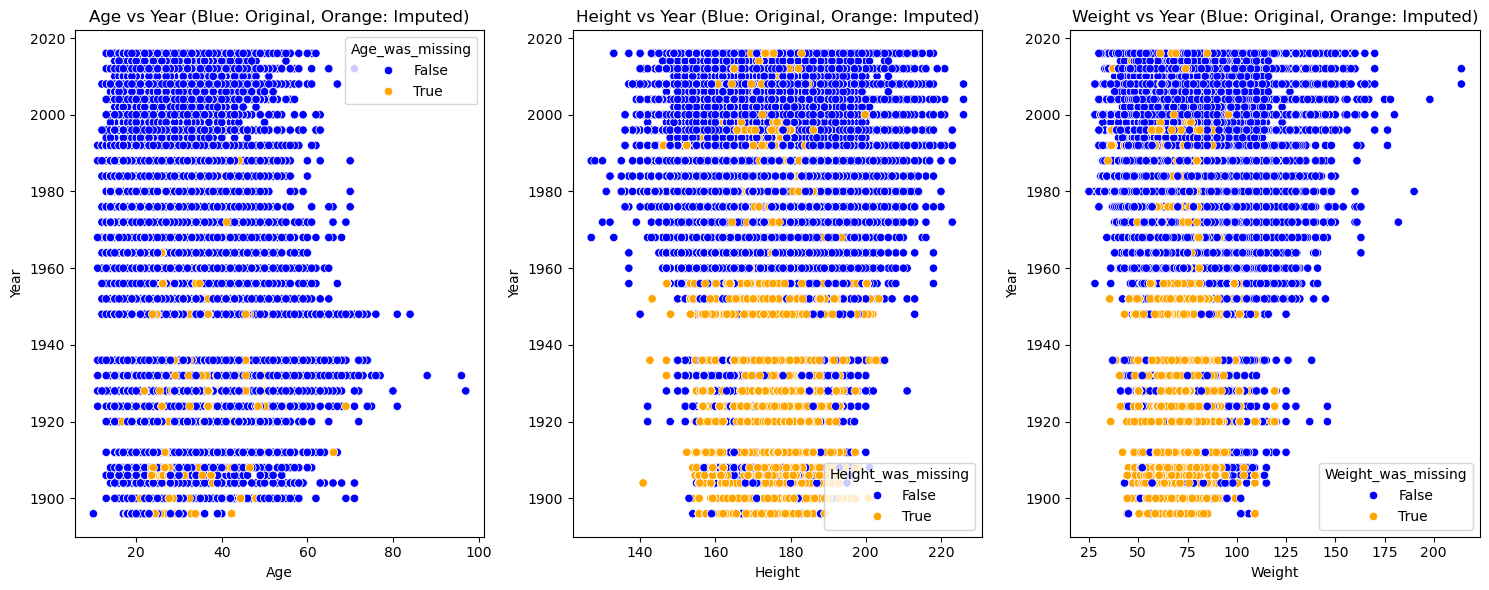

In [8]:
# KNN 적용 후 분포도 시각화
plt.figure(figsize=(15, 6))

# Age vs Year 분포도 (KNN 적용 후, 결측치 채워진 부분 추적)
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Year', data=all_data, hue='Age_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Age vs Year (Blue: Original, Orange: Imputed)')

# Height vs Year 분포도
plt.subplot(1, 3, 2)
sns.scatterplot(x='Height', y='Year', data=all_data, hue='Height_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Height vs Year (Blue: Original, Orange: Imputed)')

# Weight vs Year 분포도
plt.subplot(1, 3, 3)
sns.scatterplot(x='Weight', y='Year', data=all_data, hue='Weight_was_missing', palette={True: 'orange', False: 'blue'})
plt.title('Weight vs Year (Blue: Original, Orange: Imputed)')

plt.tight_layout()
plt.show()

In [88]:
# 데이터 프레임 저장
all_data.to_csv('./Data/cleaned_all_data.csv', index=False)

이제 깨끗히 정리된 데이터가 준비되었으니. 
기본적인 분석을 진행 해보자
- 기본적 분석

In [89]:
# 라이브러리 불러오기   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# all data에 cleaned_all data.csv 파일을 저장함
all_data = pd.read_csv('./Data/cleaned_all_data.csv')

In [90]:
# 올림픽에 참여한 총 선수 수
althlete_count = all_data['Name'].nunique()
print(f"Total number of athletes: {althlete_count}")

Total number of athletes: 134732


In [91]:
# 남성과 여성 선수 수
male_count = all_data[all_data['Sex'] == 'M']['Name'].nunique()
female_count = all_data[all_data['Sex'] == 'F']['Name'].nunique()
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of male athletes: 100979
Total number of female athletes: 33808


134,732 / 134,787
?? 차이가 발생하네 동명이인이라도 있나.


In [104]:
# 선수의 고유한 수를 이름, 성별, 국가 조합으로 계산
athlete_count = all_data[['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of athletes: {athlete_count}")

# 남성과 여성 선수 수 계산 (이름, 성별, 국가 조합 기준)
male_count = all_data[all_data['Sex'] == 'M'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
female_count = all_data[all_data['Sex'] == 'F'][['Name', 'Sex', 'NOC']].drop_duplicates().shape[0]
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

# 전체 데이터에서 ID 열의 개수 출력
total_ids = all_data['ID'].count()
print(f"Total number of IDs: {total_ids}")

Total number of athletes: 136657
Total number of male athletes: 102337
Total number of female athletes: 34320
Total number of IDs: 269731


136,657?? 왜 이렇게 나오지

문제점을 찾음. 동명이인도 있는데, 같은 선수가 여러번 출전한 것도 고려를 해야함.  
고유 ID가 있는 줄 모르고 바보같이 했네.
  
135,571(고유 ID 수) - 134,732(고유 이름 수) = 839 (동명이인 수)  
136,657이 나온 이유는 같은 선수가 여러번 출전한 것임  

In [92]:
# 고유한 선수 데이터 추출
unique_athletes = all_data.drop_duplicates(subset=['ID'])

# 고유한 선수 수 계산
athlete_count = unique_athletes['ID'].nunique()
print(f"Total number of athletes: {athlete_count}")

# 남성과 여성 선수 수 계산 (ID 기준)
male_count = unique_athletes[unique_athletes['Sex'] == 'M']['ID'].nunique()
female_count = unique_athletes[unique_athletes['Sex'] == 'F']['ID'].nunique()
print(f"Total number of male athletes: {male_count}")
print(f"Total number of female athletes: {female_count}")

Total number of athletes: 135571
Total number of male athletes: 101590
Total number of female athletes: 33981


고유 ID기준으로 정확한 총 선수 수는 다음과 같음.

총 선수 수 : 13만 5,571명  

남자 선수 수 : 10만 1,590명  
여자 선수 수 : 3만 3,981명  

그럼 이제 성비를 한번 보겠음.  

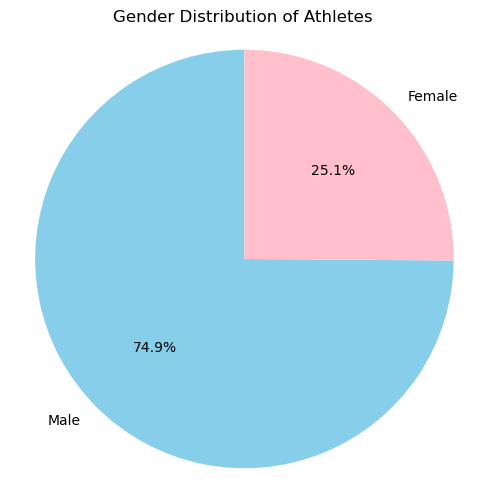

Gender ratio (Male to Female): 2.98:1


In [168]:
# 성별 분포 시각화
plt.figure(figsize=(6, 6))
plt.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution of Athletes')
plt.ylabel('')
plt.axis('equal')
plt.show()

# 성별 비율 계산
male_ratio = male_count / female_count
gender_ratio = f"{male_ratio:.2f}:1"
print(f"Gender ratio (Male to Female): {gender_ratio}")

남녀 성비는 전체적으로 3대1 비율인듯

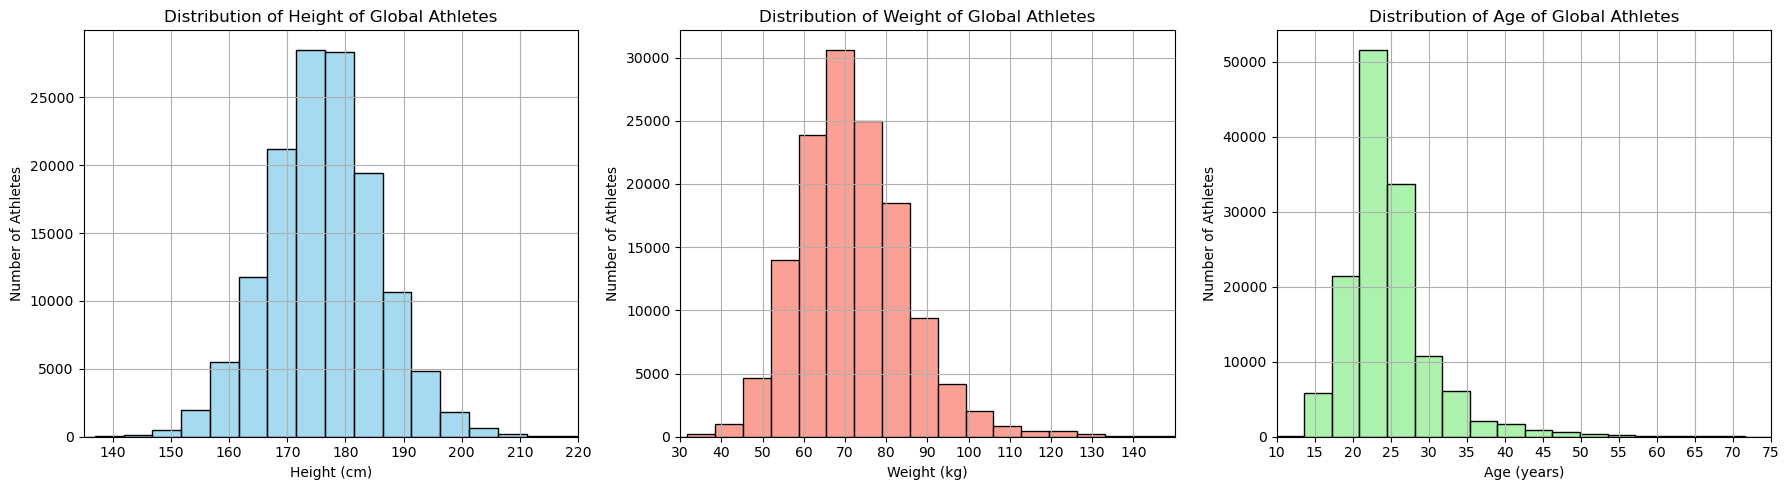

         mean   std    min    25%    50%    75%    max
Height  176.2   9.6  127.0  170.0  176.0  182.1  226.0
Weight   71.9  13.3   25.0   63.0   71.0   79.7  214.0
Age      24.6   5.8   10.0   21.0   24.0   27.0   97.0


In [250]:
# 올림픽 선수 신장, 체중, 나이 분포 시각화
plt.figure(figsize=(18, 5))

# 신장 분포
plt.subplot(1, 3, 1)
sns.histplot(unique_athletes['Height'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Distribution of Height of Global Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.xticks(range(130, 230, 10))  # 10cm 단위로 눈금 설정
plt.xlim(135, 220)  # 신장 범위 제한
plt.grid(True)

# 체중 분포
plt.subplot(1, 3, 2)
sns.histplot(unique_athletes['Weight'].dropna(), bins=28, kde=False, color='salmon')
plt.title('Distribution of Weight of Global Athletes')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Athletes')
plt.xticks(range(30, 150, 10))  # 10kg 단위로 눈금 설정
plt.xlim(30, 150)  # 체중 범위 제한
plt.grid(True)

# 나이 분포
plt.subplot(1, 3, 3)
sns.histplot(unique_athletes['Age'].dropna(), bins=24, kde=False, color='lightgreen')
plt.title('Distribution of Age of Global Athletes')
plt.xlabel('Age (years)')
plt.ylabel('Number of Athletes')
plt.xticks(range(10, 80, 5))  # 5년 단위로 눈금 설정
plt.xlim(10, 75)  # 나이 범위 제한
plt.grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 데이터 Description
print(unique_athletes[['Height', 'Weight', 'Age']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(1))

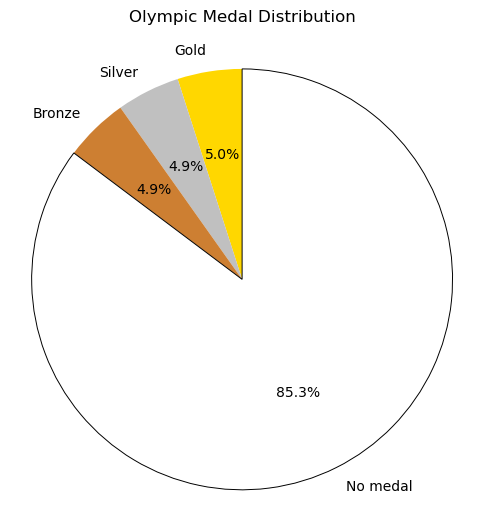

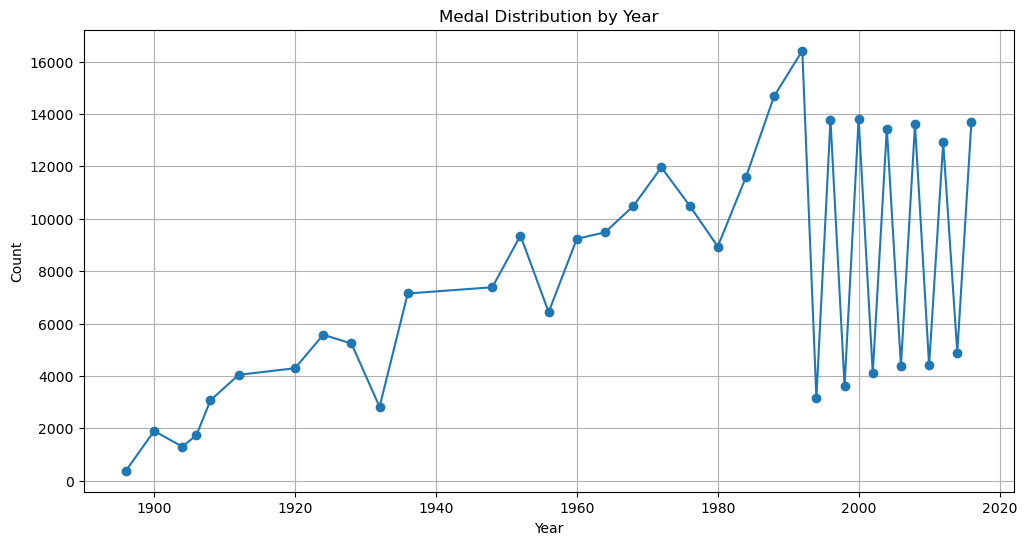

Total number of medals: 269731
Gold         13369
Silver       13108
Bronze       13295
No medal    229959
Name: Medal, dtype: int64


In [281]:
# 전체 메달 수 계산 및 시각화 (No medal 포함)
medal_count = all_data['Medal'].value_counts()

# 파이 차트 색상 지정
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#CD7F32', 'No medal': 'white'}

# 메달 순서 지정 (Gold, Silver, Bronze, No medal 순)
medal_order = ['Gold', 'Silver', 'Bronze', 'No medal']
medal_count = medal_count.reindex(medal_order, fill_value=0)

# 파이 차트 시각화 (골드, 실버, 브론즈 순으로 정렬)
plt.figure(figsize=(6, 6))  # 파이 차트 크기
wedges, texts, autotexts = plt.pie(medal_count, labels=medal_count.index, autopct='%1.1f%%', startangle=90, 
                                   colors=[medal_colors.get(medal, 'lightgrey') for medal in medal_count.index],
                                   wedgeprops={'edgecolor': None})  # 경계선을 없앰 (Gold, Silver, Bronze)

# 'No medal' 항목에만 테두리 추가 및 얇은 선 설정
for i, wedge in enumerate(wedges):
    if medal_count.index[i] == 'No medal':
        wedge.set_edgecolor('black')  # 'No medal'의 테두리 색상
        wedge.set_linewidth(0.7)  # 얇은 테두리 두께

# 제목에 pad를 추가하여 제목과 차트 사이의 간격을 띄움
plt.title('Olympic Medal Distribution', pad=20)
plt.axis('equal')  # 파이 차트를 원형으로 표시
plt.show()

# 년도 별 메달 수 계산
medal_count_by_year = all_data.groupby('Year')['Medal'].count()

# 년도 별 메달 수 시각화 (기존 스타일 유지)
plt.figure(figsize=(12, 6))
plt.plot(medal_count_by_year.index, medal_count_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Medal Distribution by Year')
plt.grid()
plt.show()

# 전체 메달 수 및 금, 은, 동 메달 수
total_medals = medal_count.sum()
print(f"Total number of medals: {total_medals}")
print(medal_count)

In [96]:
#  올림픽이 개최된 연도 내림차순으로 정렬
unique_years = all_data['Year'].unique()
unique_years = np.sort(unique_years)
unique_years = unique_years[::-1]

# 역대 올림픽 개최 년도 출력
print("List of Olympic years")
print(unique_years)

print("")

# 올림픽 스포츠 종목
sports = all_data['Sport'].unique()
print("List of Olympic sports")
print(sports)

List of Olympic years
[2016 2014 2012 2010 2008 2006 2004 2002 2000 1998 1996 1994 1992 1988
 1984 1980 1976 1972 1968 1964 1960 1956 1952 1948 1936 1932 1928 1924
 1920 1912 1908 1906 1904 1900 1896]

List of Olympic sports
['Basketball' 'Judo' 'Boxing' 'Wrestling' 'Swimming' 'Speed Skating'
 'Short Track Speed Skating' 'Softball' 'Hockey' 'Curling' 'Archery'
 'Triathlon' 'Football' 'Rhythmic Gymnastics' 'Athletics' 'Badminton'
 'Fencing' 'Figure Skating' 'Gymnastics' 'Volleyball' 'Baseball'
 'Water Polo' 'Snowboarding' 'Shooting' 'Weightlifting' 'Cycling' 'Rowing'
 'Sailing' 'Diving' 'Modern Pentathlon' 'Art Competitions'
 'Synchronized Swimming' 'Handball' 'Canoeing' 'Cross Country Skiing'
 'Table Tennis' 'Ice Hockey' 'Tennis' 'Taekwondo' 'Freestyle Skiing'
 'Beach Volleyball' 'Trampolining' 'Alpine Skiing' 'Golf' 'Biathlon'
 'Equestrianism' 'Ski Jumping' 'Tug-Of-War' 'Bobsleigh' 'Nordic Combined'
 'Polo' 'Skeleton' 'Rugby Sevens' 'Luge' 'Roque' 'Rugby' 'Lacrosse'
 'Jeu De Paume' 'M

In [97]:
# 전체 국가(NOC) 리스트 출력
unique_countries = all_data['NOC'].unique()
print(f"Total number of countries: {len(unique_countries)}")
print(unique_countries)

# 올림픽에 참여한 Region 리스트
unique_regions = all_data['Region'].unique()
print(f"Total number of regions: {len(unique_regions)}")
print(unique_regions)

# 올림픽에 참가한 도시들과 그 수
city_count = all_data['City'].nunique()
print(f"Total number of cities: {city_count}")
print(all_data['City'].unique())

Total number of countries: 230
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SIN' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' '

In [98]:
# 국가별 메달 수 계산 (금, 은, 동 순서 및 합산)
medal_count = all_data.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
medal_count['Total'] = medal_count.sum(axis=1)
medal_count = medal_count.sort_values(by='Total', ascending=False)
print(medal_count.head())

Medal  Bronze  Gold  No medal  Silver  Total
NOC                                         
USA      1358  2638     12967    1641  18604
FRA       666   499     10784     602  12551
GBR       651   677     10048     739  12115
ITA       531   575      9031     531  10668
GER       746   745      7569     674   9734


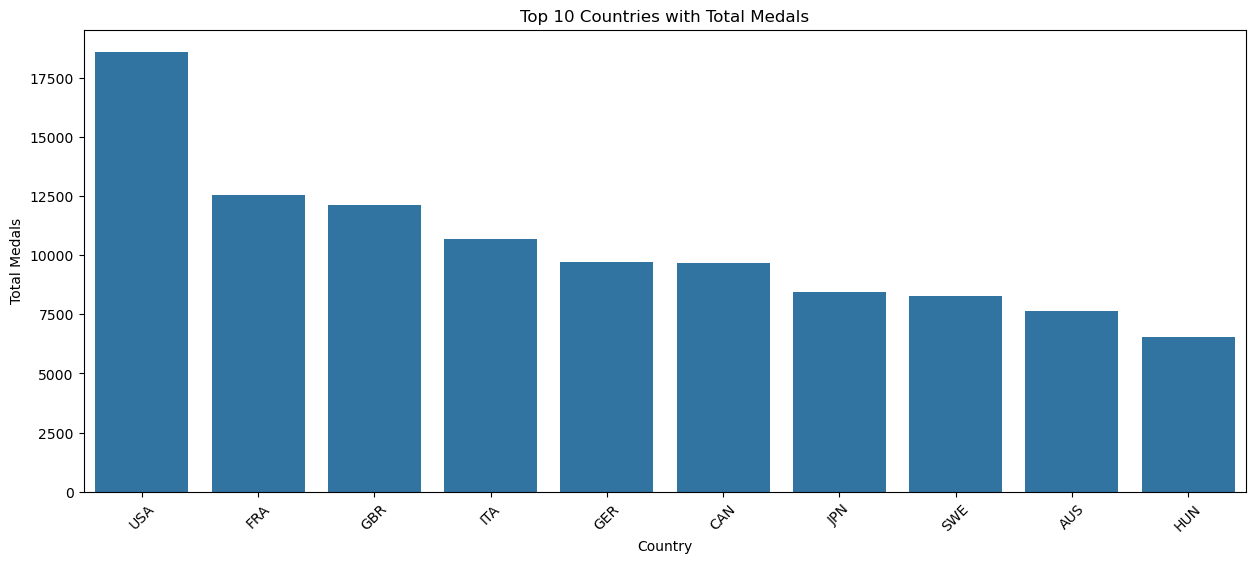

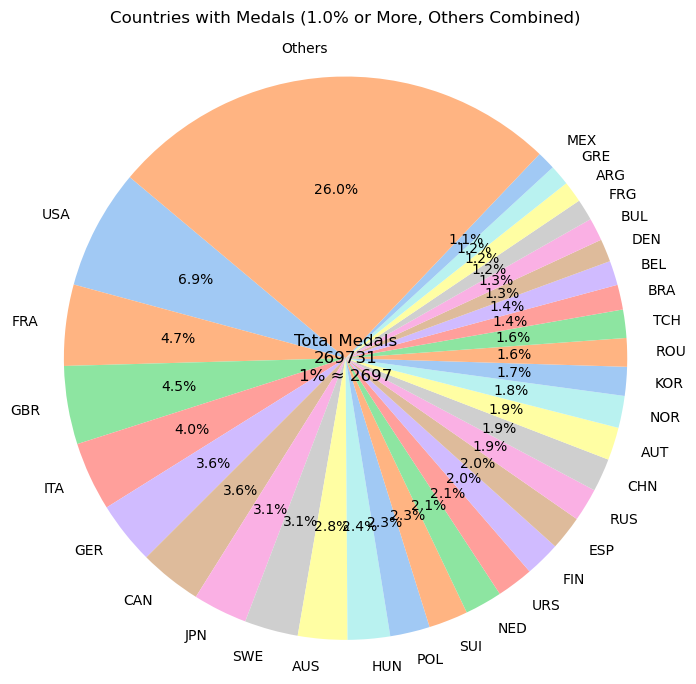

In [99]:
# Top 10 국가별 메달 수 시각화 (막대 그래프)
top_10_medal_count = medal_count.head(10)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_medal_count.index, y=top_10_medal_count['Total'], width=0.8)  # 막대폭을 줄여 가독성 향상
plt.title("Top 10 Countries with Total Medals")
plt.ylabel("Total Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)  # x축 레이블을 45도로 회전해 가독성 개선
plt.show()

# 전체 메달 수 계산
total_medals = medal_count['Total'].sum()

# 각 국가의 메달 비율 계산
medal_count['Percentage'] = (medal_count['Total'] / total_medals) * 100

# 차지 비율이 1% 이상인 국가만 포함 (1.0% 포함, 0.9% 제외)
above_threshold = medal_count[medal_count['Percentage'] >= 1.0]  # 1.0% 이상인 국가
below_threshold_sum = medal_count[medal_count['Percentage'] < 1.0]['Total'].sum()  # 1.0% 미만 국가의 메달 합산

# "Others"로 추가
final_medal_count = above_threshold['Total'].append(pd.Series(below_threshold_sum, index=['Others']))

# 파이 차트 시각화
plt.figure(figsize=(8, 8))

# 파이 차트 그리기
plt.pie(final_medal_count, labels=final_medal_count.index, autopct=autopct_func, startangle=140, colors=sns.color_palette("pastel"))

# 파이 차트 중앙에 전체 메달 수와 1%에 해당하는 메달 수 표시
one_percent_medals = total_medals * 0.01  # 1%에 해당하는 메달 수
plt.text(0, 0, f"Total Medals\n{total_medals}\n1% ≈ {int(one_percent_medals)}", ha='center', va='center', fontsize=12, color='black')

# 제목과 차트 사이의 간격 추가 (pad=20으로 설정하여 간격을 벌림)
plt.title(f"Countries with Medals (1.0% or More, Others Combined)", pad=20)

plt.axis('equal')  # 원형이 찌그러지지 않게 함
plt.show()

1984년대 이후 각 국가별 메달 수 추이.

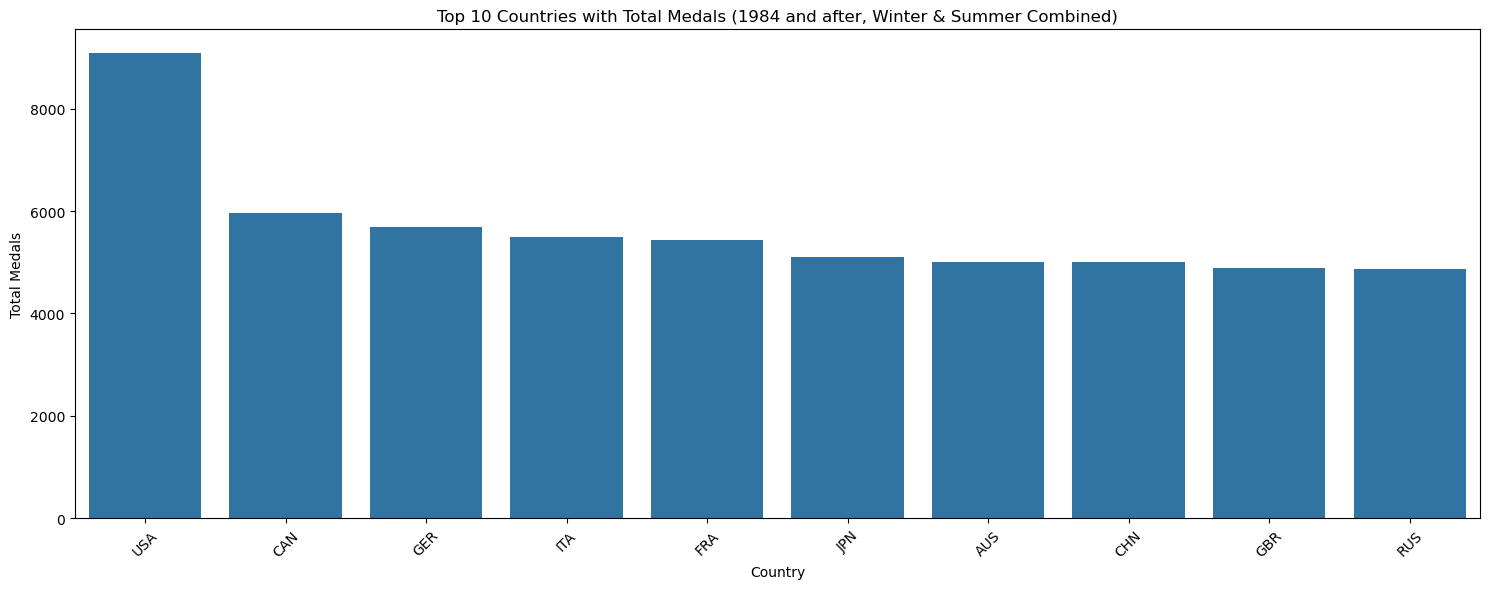

In [100]:
# 1. 1984년 이후 데이터 필터링 (하계 및 동계 올림픽 합산)
medal_data_1984 = all_data[all_data['Year'] >= 1984]

# 2. 국가별 메달 수 계산 (하계 및 동계 합산)
medal_count_1984 = medal_data_1984.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
medal_count_1984['Total'] = medal_count_1984.sum(axis=1)
medal_count_1984 = medal_count_1984.sort_values(by='Total', ascending=False)

# 3. 상위 10개 국가 선택
top_10_medal_count_1984 = medal_count_1984.head(10)

# 4. 1984년 이후 Top 10 국가별 메달 수 시각화 (막대 그래프)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_medal_count_1984.index, y=top_10_medal_count_1984['Total'], width=0.8)
plt.title("Top 10 Countries with Total Medals (1984 and after, Winter & Summer Combined)")
plt.ylabel("Total Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

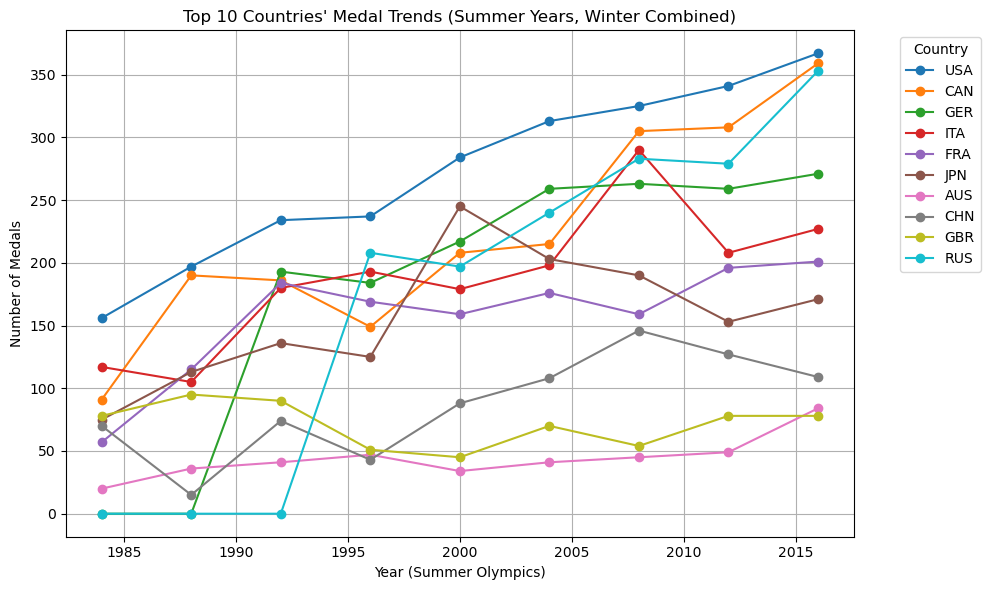

In [101]:
# 1. 1984년 이후 데이터 필터링
medal_data_1984 = all_data[all_data['Year'] >= 1984]

# 2. 동계와 하계 데이터를 분리
summer_olympics = medal_data_1984[medal_data_1984['Season'] == 'Summer'].copy()
winter_olympics = medal_data_1984[medal_data_1984['Season'] == 'Winter'].copy()

# 3. 동계 올림픽의 메달 수를 다음 하계 올림픽 해에 합산
# 하계올림픽 연도 리스트: 2016, 2012, 2008, 2004, 2000, 1996 (1992년까지는 동계 하계 같이)
summer_years = [1996, 2000, 2004, 2008, 2012, 2016]
winter_to_summer_mapping = {1994: 1996, 1998: 2000, 2002: 2004, 2006: 2008, 2010: 2012, 2014: 2016}

# 4. 동계 메달 수를 하계 해로 매핑하여 합산
winter_olympics['Mapped_Year'] = winter_olympics['Year'].replace(winter_to_summer_mapping)

# 5. 국가별 하계 및 동계 메달 수 합산 (하계 기준)
summer_combined = pd.concat([summer_olympics, winter_olympics])
medal_trend_combined = summer_combined.pivot_table(index='Mapped_Year', columns='NOC', values='Medal', aggfunc='size', fill_value=0)

# 6. 상위 10개 국가 선택
medal_count_1984 = summer_combined.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)
medal_count_1984['Total'] = medal_count_1984.sum(axis=1)
medal_count_1984 = medal_count_1984.sort_values(by='Total', ascending=False)
top_10_countries = medal_count_1984.head(10).index

# 7. 하계 올림픽 해 기준으로 동계와 합산한 국가별 메달 수 추이 시각화 (라인 그래프)
plt.figure(figsize=(10, 6))
for country in top_10_countries:
    if country in medal_trend_combined.columns:
        plt.plot(medal_trend_combined.index, medal_trend_combined[country], marker='o', label=country)

plt.title("Top 10 Countries' Medal Trends (Summer Years, Winter Combined)")
plt.xlabel("Year (Summer Olympics)")
plt.ylabel("Number of Medals")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

전체 데이터셋의 기본적인 분석을 해보았다.  
이제는 주제를 특정해서 분석을 진행하도록 하자.  

우리의 주제는. '한국올림픽의 성과를 높이기 위한 방법'으로.   
데이터를 분석하여 솔루션을 제공하는 것이다.  

크게 세가지 방향성이 있을 수 있겠다.  
1. 새로운 종목을 개척한다면 어느 종목이 될 것인지.  
2. 강점을 보이는 종목은 어떻게 보완을 할 것인지.  
3. 저조한 성과를 보이는 종목은 어떻게 보완을 할 것인지.  

1번 같은 경우,   
현실적으로 새로운 종목을 개척하고자 한다고 해도. 상당한 시간과 비용이 투자된다.  
따라서 단순한 분석만으로 그러한 투자를 하기엔 무리가 있다고 판단되었다.  

2번 같은 경우,   
잘 하고 있는 종목은 어짜피 잘 하고 있으니.   
데이터 분석보다 해당 종목의 선수들이 더 잘 알것이다.  

3번 같은 경우,   
이미 종목은 개설되었으나, 성적이 부진한 경우다.   
1번과 같이 인프라 구축을 위한 시간과 비용의 문제는 없다.

따라서,  
우리는 3번을 중심으로 분석을 해보고자 한다.   
이는 주제와도 부합하며, 현실적인 솔루션이 될 것이라 생각했다.  

- 한국 기준 데이터 기본 분석

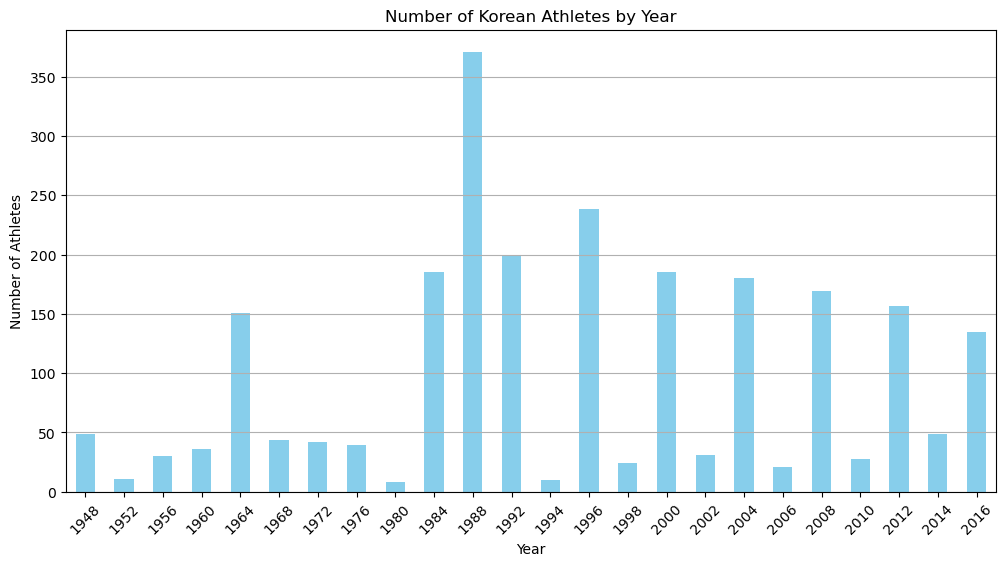

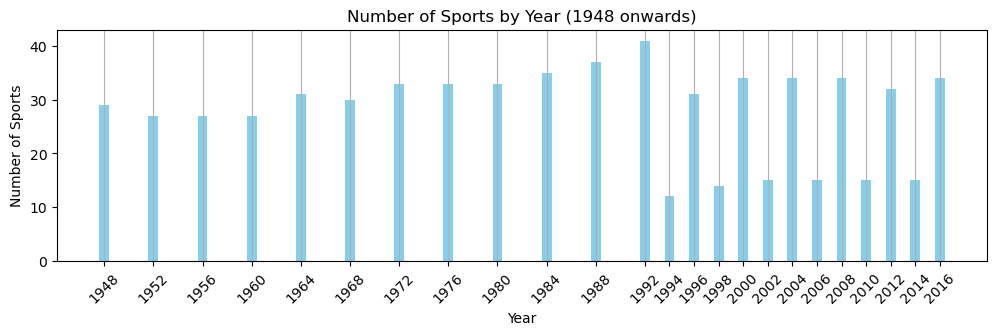

In [154]:
# 1. all_data에서 한국 선수만 추출
korea = all_data[all_data['NOC'] == 'KOR']

# 2. 고유 ID 기준으로 중복 제거
unique_korea_athletes = korea.drop_duplicates(subset=['ID'])

# 3. 총 한국 선수 수 계산 (ID 기준)
korea_athletes = unique_korea_athletes['ID'].nunique()

# 년도 별 출전 한국 선수 수 계산
korea_athletes_by_year = unique_korea_athletes.groupby('Year')['ID'].count()

# 년도 별 출전 한국 선수 수 막대 그래프 시각화
plt.figure(figsize=(12, 6))
korea_athletes_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Korean Athletes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 1948년부터의 데이터만 추출
sports_by_year = all_data[all_data['Year'] >= 1948].groupby('Year')['Sport'].nunique()

# 시각화
plt.figure(figsize=(12, 3))
plt.bar(sports_by_year.index, sports_by_year.values, color='skyblue')
plt.title('Number of Sports by Year (1948 onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Sports')

# x축 눈금을 일정한 4년 간격으로 설정 그리고 동계 올림픽 년도 추가
years = list(range(1948, sports_by_year.index.max() + 1, 4))
additional_years = [1994, 1998, 2002, 2006, 2010, 2014]
all_years = sorted(set(years + additional_years))
plt.xticks(all_years, rotation=45)

# 세로 격자 눈금 제거
plt.grid(axis='x')

plt.show()

일단 흥미로운 점은 1964년도와 1988년도의 급격한 출전 선수 수의 증가이다.  
  
그리고 하계와 동계 올림픽이 분리되어 개최되기 시작한 92년도를 기준으로 보면,  
하계 올림픽의 출전 선수 수는 감소하는 추세를 보이고.  
동계 올림픽의 출전 선수 수는 증가하는 추세를 보인다.  
  
이러한 추세가 혹여, 종목 수의 변화로 나타나는게 아닌가 싶어 확인해보니  
아래의 차트와 같이, 종목 수의 변화는 거의 없음을 확인할 수 있다.  
  
해당 추세가 동일하게 다른 국가에서도 나타나는지 궁금해졌다.   
가장 좋은 비교 대상이 '미국'이라고 생각했다. 올림픽 부동의 1위이기 때문이다.  
  
아래는 '미국'과 비교했을 때, 출전 선수 수를 비교하는 플롯이다.  
일단 총 선수 수가 다르기 때문에 한국 선수의 최대값 기준으로 리스케일링 해줬다.  
그리고 출전하는 종목의 가짓수가 다른 점도 있기 때문에 한국이 출전하는 종목으로 제한 했다.  

Total number of USA athletes: 8794


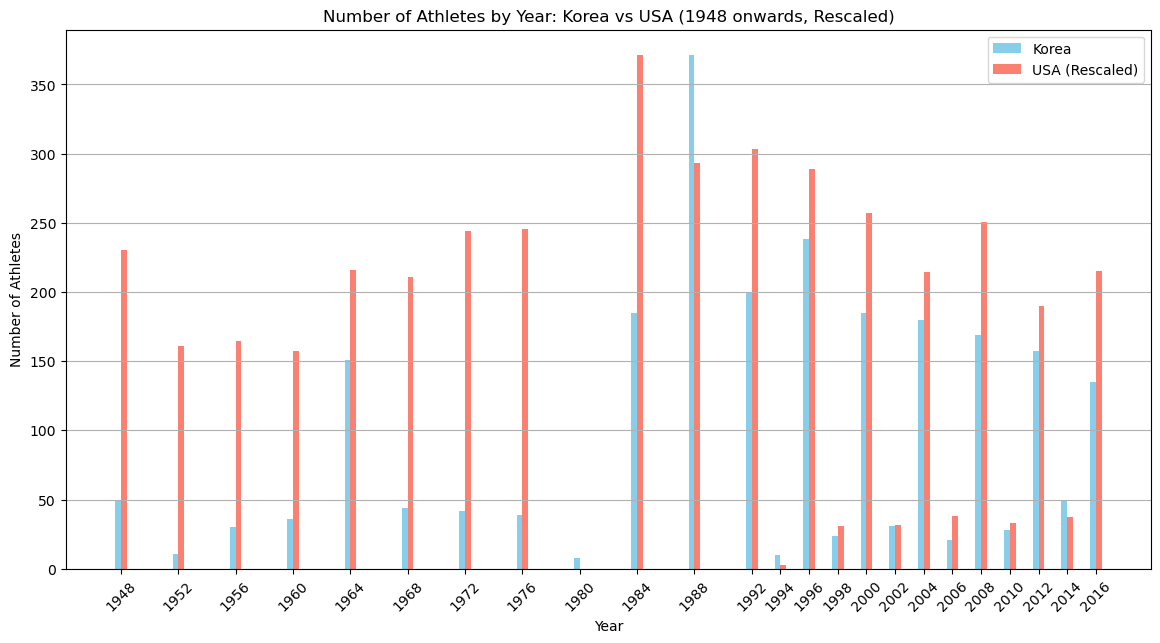

In [134]:
from sklearn.preprocessing import MinMaxScaler

# 한국이 출전한 종목 리스트 추출
korea_sports = korea['Sport'].unique()

# 미국 선수만 추출
usa = all_data[all_data['NOC'] == 'USA']

# 한국이 출전한 종목에 해당하는 미국 선수만 추출
usa_filtered = usa[usa['Sport'].isin(korea_sports)]

# 총 미국 선수 수 계산 (ID 기준)
usa_athletes = usa_filtered['ID'].nunique()
print(f"Total number of USA athletes: {usa_athletes}")

# 년도 별 출전 미국 선수 수 계산 (1948년부터)
usa_athletes_by_year = usa_filtered[usa_filtered['Year'] >= 1948].drop_duplicates(subset=['ID']).groupby('Year')['ID'].count()

# 미국 선수 수를 한국 선수 수에 맞게 리스케일링
scaler = MinMaxScaler(feature_range=(0, korea_athletes_by_year.max()))
usa_athletes_by_year_scaled = scaler.fit_transform(usa_athletes_by_year.values.reshape(-1, 1)).flatten()

# 년도 별 출전 선수 수 비교 막대 그래프 시각화
plt.figure(figsize=(14, 7))
width = 0.4  # 막대 너비

# 막대 그래프 생성
plt.bar(korea_athletes_by_year.index - width/2, korea_athletes_by_year.values, width=width, label='Korea', color='skyblue')
plt.bar(usa_athletes_by_year.index + width/2, usa_athletes_by_year_scaled, width=width, label='USA (Rescaled)', color='salmon')

# 제목과 레이블 설정
plt.title('Number of Athletes by Year: Korea vs USA (1948 onwards, Rescaled)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')

# x축 눈금을 일정한 4년 간격으로 설정 그리고 동계 올림픽 년도 추가
years = list(range(1948, korea_athletes_by_year.index.max() + 1, 4))
additional_years = [1994, 1998, 2002, 2006, 2010, 2014]
all_years = sorted(set(years + additional_years))
plt.xticks(all_years, rotation=45)

plt.legend()
plt.grid(axis='y')

# 플롯 표시
plt.show()

기본적으로 추세는 비슷하나, 동계 선수의 수는 충분한 반면, 하계 선수의 수가 미국에 비해 적다는 것을 알 수 있다.    
  
수치만 놓고 단순하게 생각했을 때,  
현재 우리가 하고 있는 하계 종목에서 선수만 추가해줘도 더 좋은 성적을 얻을 수 있음을 기대해볼 수 있다.

그렇다면 하계 선수에 평균적으로 몇 명의 선수를 증가시켜야 하는지 계산 해볼 수 있다.

In [138]:
# 92년도부터 하계 올림픽 년도 리스트 생성
summer_olympics_years = list(range(1992, 2024, 4))

# 한국 선수 중 92년도부터 하계 올림픽 참가 선수만 추출
korea_summer = korea[korea['Year'].isin(summer_olympics_years)]

# 한국 선수 수 계산 (ID 기준)
korea_athletes_by_year = korea_summer.drop_duplicates(subset=['ID']).groupby('Year')['ID'].count()

# 미국 선수 중 92년도부터 하계 올림픽 참가 선수만 추출
usa_summer = usa[usa['Year'].isin(summer_olympics_years)]

# 미국 선수 수 계산 (ID 기준)
usa_athletes_by_year = usa_summer.drop_duplicates(subset=['ID']).groupby('Year')['ID'].count()

# 미국 선수 수를 한국 선수 수에 맞게 리스케일링
scaler = MinMaxScaler(feature_range=(0, korea_athletes_by_year.max()))
usa_athletes_by_year_scaled = scaler.fit_transform(usa_athletes_by_year.values.reshape(-1, 1)).flatten()

# 한국과 미국의 참가 선수 총합 후 평균 계산
korea_total = korea_athletes_by_year.sum()
usa_total_scaled = usa_athletes_by_year_scaled.sum()

korea_avg = korea_total / len(summer_olympics_years)
usa_avg_scaled = usa_total_scaled / len(summer_olympics_years)

# 평균 차이 계산
difference = usa_avg_scaled - korea_avg

print(f"Difference in average number of athletes (USA - Korea, scaled): {difference:.2f}")

Difference in average number of athletes (USA - Korea, scaled): -96.39


따라서 비슷한 규모의 국가를 상대할 때 인원 수 대비 미국과 비슷한 경쟁력을 가지려면,  
하계 올림픽에 대략 96명 정도의 선수를 증가 시키면 된다는 결론이 나온다.  
  
물론 인원 수가 성과를 보장해주지 않는다는 점은 명백하다.  
단순히 인원 수에만 초점을 맞춘 분석이기에 큰 중요성을 가지진 않는다.  
하계 올림픽 선수들을 좀 증가시켜야 하구나 정도로만 생각하면 될 것 같다.  

그렇다면 궁금해질 수 밖에 없다.  
때꿀수가 정말 성과에 큰 영향을 미치는가?  
간단히 계산해볼 수 있을 것 같은데,  
총 메달 수를 총 인원수로 나눠 보면 인당 몇 개 메달 따는지 볼 수 있을 것 같다.  

한국, 일본, 미국, 중국을 서로 비교해보도록 하자.  

In [147]:
# 나라의 선수 총합 대비 메달 총합 비율을 계산하는 함수
def calculate_athlete_medal_ratio(country_code, start_year):
    country_data = all_data[(all_data['NOC'] == country_code) & (all_data['Year'] >= start_year)]
    
    # 선수 총합 계산 (ID 기준)
    athletes_total = country_data['ID'].nunique()
    print(f"Total {country_code} athletes since {start_year}: {athletes_total}")

    # 메달 총합 계산
    medals_total = country_data['Medal'].notna().sum()
    print(f"Total {country_code} medals since {start_year}: {medals_total}")

    # 선수 총합 나누기 메달 총합 계산
    ratio = medals_total / athletes_total
    print(f"Ratio of total athletes to total medals for {country_code} (since {start_year}): {ratio}")
    return ratio

# 한국, 일본, 중국, 미국에 대한 계산
korea_ratio = calculate_athlete_medal_ratio('KOR', 1992)
japan_ratio = calculate_athlete_medal_ratio('JPN', 1992)
china_ratio = calculate_athlete_medal_ratio('CHN', 1992)
usa_ratio = calculate_athlete_medal_ratio('USA', 1992)

Total KOR athletes since 1992: 1486
Total KOR medals since 1992: 2913
Ratio of total athletes to total medals for KOR (since 1992): 1.9602960969044414
Total JPN athletes since 1992: 1978
Total JPN medals since 1992: 4132
Ratio of total athletes to total medals for JPN (since 1992): 2.088978766430738
Total CHN athletes since 1992: 2157
Total CHN medals since 1992: 4167
Ratio of total athletes to total medals for CHN (since 1992): 1.9318497913769124
Total USA athletes since 1992: 3680
Total USA medals since 1992: 7335
Ratio of total athletes to total medals for USA (since 1992): 1.9932065217391304


인원 대비 메달의 효율을 순위 매겨 보자면,  
1. 일본  2.08  
2. 미국  1.99  
3. 한국  1.96  
4. 중국  1.93  

역시 중국은 좀 물량 빨이 어느정도 있는것 같다.  
일본은 중국이랑 비교했을 때, 178명 부족한데, 메달 차이는 32개 밖에 안나니까. 선수들의 퀄리티가 확실히 좋은것 같다.  
미국은 물량도 많은데 선수들 퀄리티도 좋은 것 같고.  

선수들의 기량을 높여서, 더 많은 메달을 기대하는 것 보다,  
인원수를 증가 시키는게 메달을 더 많이 확보하는데에는 효과적일 것이다.  
하지만 앞서 말했듯이. 선수 한명을 육성하는데 상당히 많은 시간과 자원이 든다는 점이 문제다.  

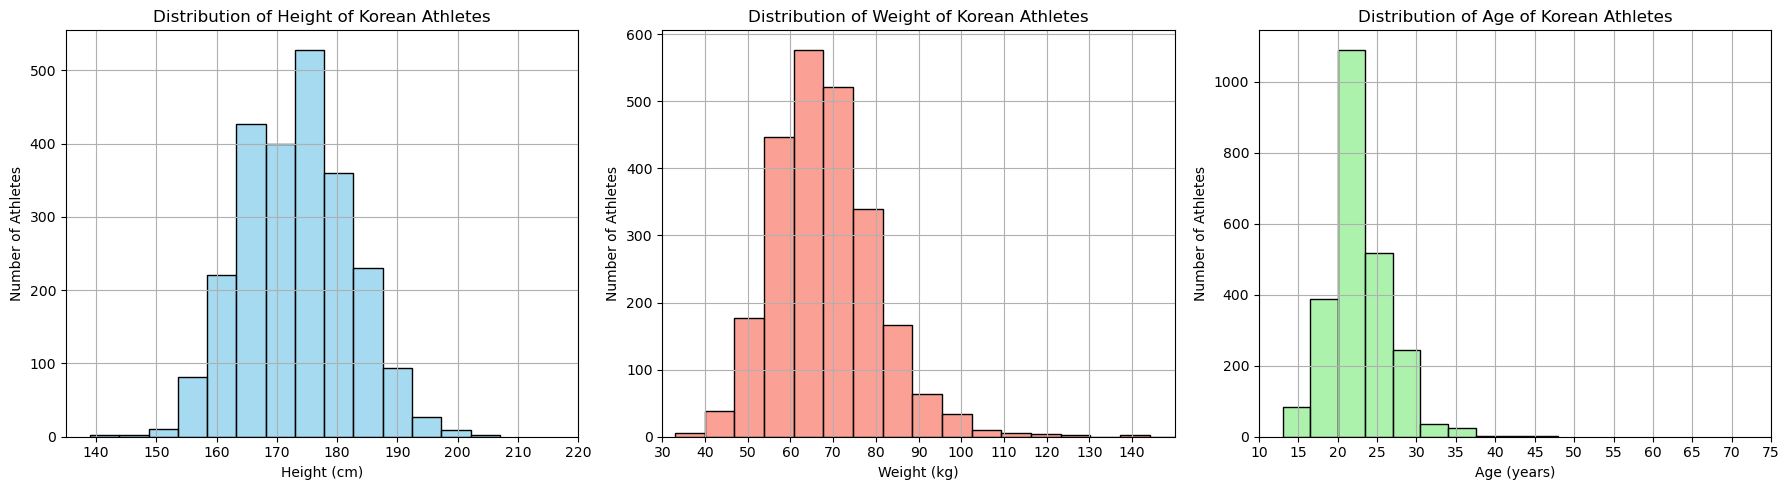

         mean   std    min    25%    50%    75%    max
Height  173.2   8.8  139.0  167.0  173.0  179.0  207.0
Weight   68.0  12.1   33.0   60.0   67.0   75.0  158.0
Age      22.5   3.8   13.0   20.0   22.0   25.0   48.0


In [251]:
# 한국 선수 나이, 신장, 체중 분포 시각화
plt.figure(figsize=(18, 5))

# 신장 분포
plt.subplot(1, 3, 1)
sns.histplot(unique_korea_athletes['Height'].dropna(), bins=14, kde=False, color='skyblue')
plt.title('Distribution of Height of Korean Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Athletes')
plt.xticks(range(130, 230, 10))  # 10cm 단위로 눈금 설정
plt.xlim(135, 220)  # 신장 범위 제한
plt.grid(True)

# 체중 분포
plt.subplot(1, 3, 2)
sns.histplot(unique_korea_athletes['Weight'].dropna(), bins=18, kde=False, color='salmon')
plt.title('Distribution of Weight of Korean Athletes')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Athletes')
plt.xticks(range(30, 150, 10))  # 10kg 단위로 눈금 설정
plt.xlim(30, 150)  # 체중 범위 제한
plt.grid(True)

# 나이 분포
plt.subplot(1, 3, 3)
sns.histplot(unique_korea_athletes['Age'].dropna(), bins=10, kde=False, color='lightgreen')
plt.title('Distribution of Age of Korean Athletes')
plt.xlabel('Age (years)')
plt.ylabel('Number of Athletes')
plt.xticks(range(10, 80, 5))  # 5년 단위로 눈금 설정
plt.xlim(10, 75)  # 나이 범위 제한
plt.grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 데이터 Description
print(unique_korea_athletes[['Height', 'Weight', 'Age']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(1))

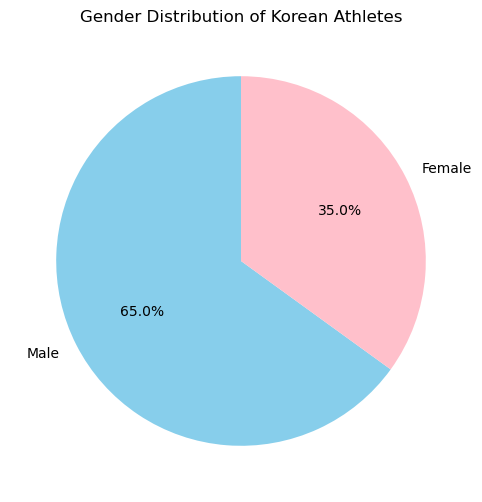

Gender ratio (Male to Female): 1.86:1


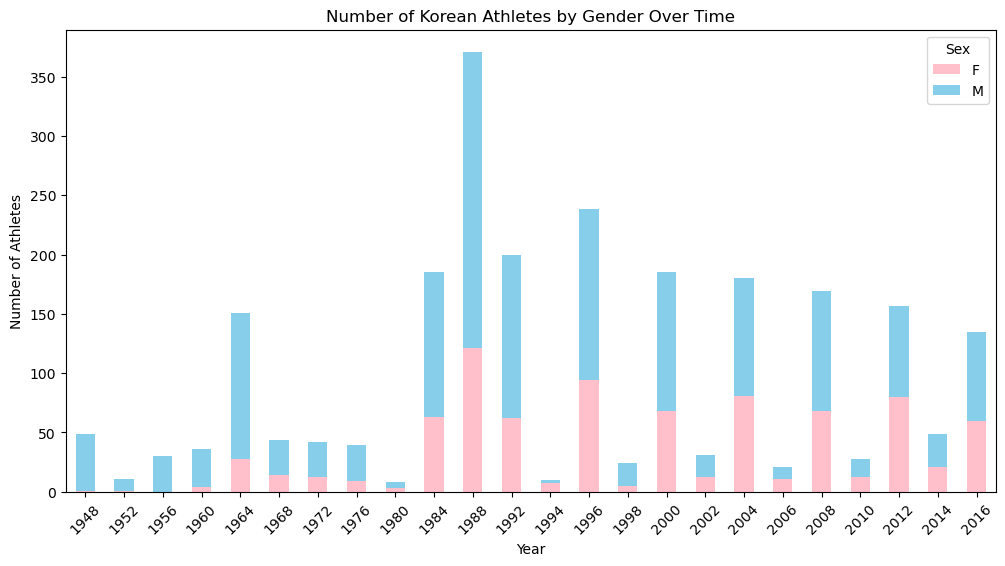

In [167]:
# 한국 남자 선수들의 수
korea_male_athletes = unique_korea_athletes[unique_korea_athletes['Sex'] == 'M']['ID'].nunique()

# 한국 여자 선수들의 수
korea_female_athletes = unique_korea_athletes[unique_korea_athletes['Sex'] == 'F']['ID'].nunique()

# 성별 분포 시각화
plt.figure(figsize=(6, 6))
plt.pie([korea_male_athletes, korea_female_athletes], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution of Korean Athletes')
plt.ylabel('')
plt.show()

# 성별 비율 계산 (소수점 포함)
male_ratio = korea_male_athletes / korea_female_athletes
gender_ratio = f"{male_ratio:.2f}:1"
print(f"Gender ratio (Male to Female): {gender_ratio}")

# 시간에 따른 한국의 남성 여성 선수 수 변화

# 연도별 성별 선수 수 계산
korea_gender_year = korea.drop_duplicates(subset=['ID']).groupby(['Year', 'Sex'])['ID'].count().unstack()
korea_gender_year.fillna(0, inplace=True)

# 시각화
korea_gender_year.plot(kind='bar', stacked=True, figsize=(12,6), color=['pink', 'skyblue'])
plt.title('Number of Korean Athletes by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()


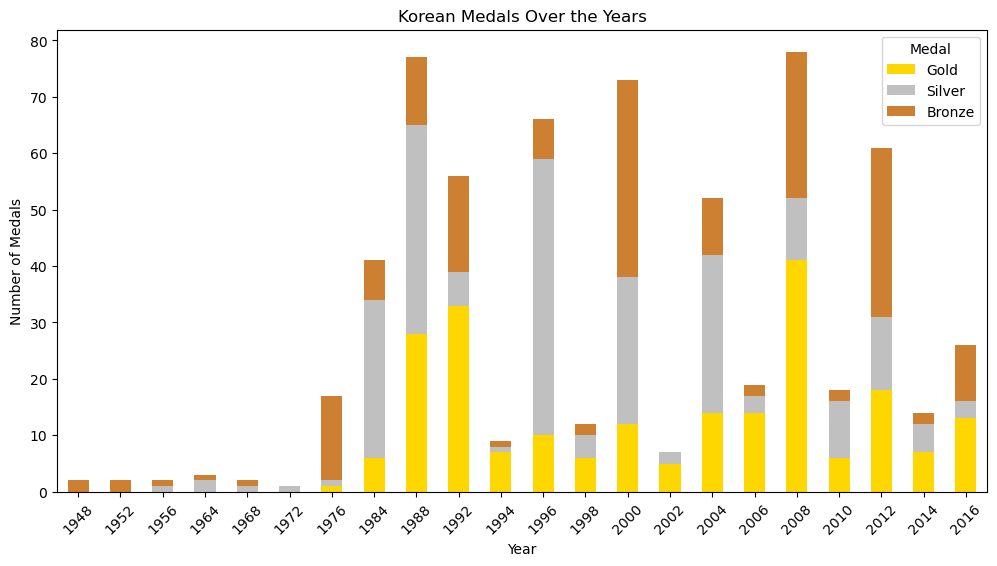

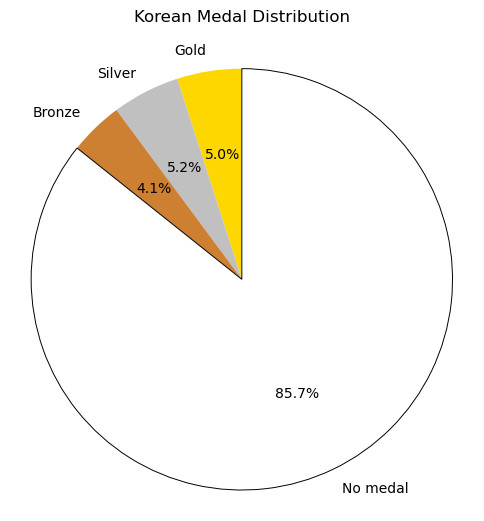

Total number of Korean medals: 4464
No medal    3826
Silver       232
Gold         221
Bronze       185
Name: Medal, dtype: int64


In [276]:
# 한국의 역대 메달 획득 분포 X축 년도, Y축 메달 수 (금, 은, 동)

# 메달 정보 정리
korea_medals = korea.copy()

# 'No medal'을 제외한 메달 순서 지정
medal_order = ['Gold', 'Silver', 'Bronze']
medals_by_year = korea_medals[korea_medals['Medal'] != 'No medal'].groupby(['Year', 'Medal'])['ID'].count().unstack().reindex(columns=medal_order, fill_value=0)

# 시각화 (막대 그래프)
medals_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gold', 'silver', '#CD7F32'])
plt.title('Korean Medals Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.show()

# 금, 은, 동, 미달 비율 파이 차트 시각화

# 메달 분포 계산
medal_distribution = korea_medals['Medal'].value_counts()

# 파이 차트 색상 지정
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#CD7F32', 'No medal': 'white'}

# 메달 순서 지정 (Gold, Silver, Bronze, No medal 순)
medal_order = ['Gold', 'Silver', 'Bronze', 'No medal']
medal_distribution = medal_distribution.reindex(medal_order, fill_value=0)

# 파이 차트 시각화 (골드, 실버, 브론즈 순으로 정렬)
plt.figure(figsize=(6, 6))  # 파이 차트 크기
wedges, texts, autotexts = plt.pie(medal_distribution, labels=medal_distribution.index, autopct='%1.1f%%', startangle=90, 
                                   colors=[medal_colors.get(medal, 'lightgrey') for medal in medal_distribution.index],
                                   wedgeprops={'edgecolor': None})  # 경계선을 없앰 (Gold, Silver, Bronze)

# 'No medal' 항목에만 테두리 추가 및 얇은 선 설정
for i, wedge in enumerate(wedges):
    if medal_distribution.index[i] == 'No medal':
        wedge.set_edgecolor('black')  # 'No medal'의 테두리 색상
        wedge.set_linewidth(0.7)  # 얇은 테두리 두께

# 제목에 pad를 추가하여 제목과 차트 사이의 간격을 띄움
plt.title('Korean Medal Distribution', pad=20)
plt.axis('equal')  # 파이 차트를 원형으로 표시
plt.show()

# 한국의 전체 매달 수와 금,은,동 메달의 수 출력
total_medals = korea_medals['Medal'].count()
medal_count = korea_medals['Medal'].value_counts()
print(f"Total number of Korean medals: {total_medals}")
print(medal_count)

In [ ]:
# 한국의 년도별 종목 변화. (새롭게 추가된 종목만 나열)

# 연도별 한국이 참가한 종목 리스트
korea_sports_by_year = korea.groupby('Year')['Sport'].unique()

# 새롭게 추가된 종목 식별
new_sports = {}
previous_sports = set()
for year, sports in korea_sports_by_year.items():
    sports_set = set(sports)
    added_sports = sports_set - previous_sports
    if added_sports:
        new_sports[year] = added_sports
    previous_sports = previous_sports.union(sports_set)

# 결과 출력
print("New sports added by Korea each year:")
for year, sports in new_sports.items():
    print(f"{year}: {', '.join(sports)}")

In [ ]:
# 한국의 종목별 총 메달 수 리스트.

# 종목별 메달 수 계산
korea_medals = korea.dropna(subset=['Medal'])
medals_by_sport = korea_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)
print("Total medals by sport for Korea:")
print(medals_by_sport)

# 한국의 종목별 참가 선수 수.

# 종목별 선수 수 계산
athletes_by_sport = korea.drop_duplicates(subset=['ID']).groupby('Sport')['ID'].count().sort_values(ascending=False)
print("Number of athletes by sport for Korea:")
print(athletes_by_sport)

# 한국의 시간에 따른 종목별 메달 수 변화. 및 시각화

# 연도별 종목별 메달 수 계산
medals_by_sport_year = korea_medals.groupby(['Year', 'Sport'])['Medal'].count().unstack().fillna(0)

# 시각화 (상위 5개 종목)
top_sports = medals_by_sport.index[:5]
medals_top_sports = medals_by_sport_year[top_sports]

medals_top_sports.plot(figsize=(12,6))
plt.title('Medals Over Time for Top 5 Sports in Korea')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Sport')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 시간에 따른 한국에 금메달을 가장 많이 가져다준 종목들

# 종목별 금메달 수 계산
korea_gold_medals = korea[korea['Medal'] == 'Gold']
gold_medals_by_sport = korea_gold_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)
print("Sports that have given Korea the most gold medals:")
print(gold_medals_by_sport)

# 시간에 따른 한국에 은, 동 메달을 가장 많이 가져다준 종목들

# 종목별 은메달 수 계산
korea_silver_medals = korea[korea['Medal'] == 'Silver']
silver_medals_by_sport = korea_silver_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)
print("Sports that have given Korea the most silver medals:")
print(silver_medals_by_sport)

# 종목별 동메달 수 계산
korea_bronze_medals = korea[korea['Medal'] == 'Bronze']
bronze_medals_by_sport = korea_bronze_medals.groupby('Sport')['Medal'].count().sort_values(ascending=False)
print("Sports that have given Korea the most bronze medals:")
print(bronze_medals_by_sport)

In [ ]:

# 분석 후 약점을 보이는 종목 중 가능성 있는 종목 선택. 종목 집중해서 분석.

# 메달 획득 비율이 낮은 종목 식별
athletes_by_sport = korea.drop_duplicates(subset=['ID']).groupby('Sport')['ID'].count()
medals_by_sport_total = korea_medals.groupby('Sport')['Medal'].count()
medal_ratio = medals_by_sport_total / athletes_by_sport
medal_ratio.fillna(0, inplace=True)
medal_ratio = medal_ratio.sort_values()

print("Medal ratio by sport for Korea:")
print(medal_ratio)

# 메달 획득 비율이 낮지만 선수 참여가 많은 종목 선택 (예: 'Swimming')
potential_sport = medal_ratio.index[0]
print(f"Selected sport for further analysis: {potential_sport}")

# 해당 종목이 국제 적으로 몇 위인지 확인

# 해당 종목의 국가별 메달 수
sport_data = all_data[all_data['Sport'] == potential_sport]
sport_medals = sport_data.dropna(subset=['Medal'])
medals_by_country = sport_medals.groupby('NOC')['Medal'].count().sort_values(ascending=False)

print(f"Total medals in {potential_sport} by country:")
print(medals_by_country)

# 해당 종목의 선수들의 평균 키, 체중, 나이 확인

# 해당 종목의 선수들의 평균 값 계산
sport_athletes = sport_data.drop_duplicates(subset=['ID'])
avg_height = sport_athletes['Height'].mean()
avg_weight = sport_athletes['Weight'].mean()
avg_age = sport_athletes['Age'].mean()

print(f"Average Height in {potential_sport}: {avg_height:.2f} cm")
print(f"Average Weight in {potential_sport}: {avg_weight:.2f} kg")
print(f"Average Age in {potential_sport}: {avg_age:.2f} years")

# 해당 종목의 선수들의 성별 분포 확인

# 성별 분포 계산
gender_counts_sport = sport_athletes['Sex'].value_counts()
print(f"Gender distribution in {potential_sport}:")
print(gender_counts_sport)

# 해당 종목의 선수들의 국가 분포 확인

# 국가별 선수 수 계산
athletes_per_country = sport_athletes['NOC'].value_counts()
print(f"Athletes per country in {potential_sport}:")
print(athletes_per_country)

# 해당 종목의 한국 선수들의 평균 키, 체중, 나이, 성별 분포 확인

# 한국 선수 데이터 추출
korea_sport_athletes = korea[korea['Sport'] == potential_sport].drop_duplicates(subset=['ID'])
avg_height_korea = korea_sport_athletes['Height'].mean()
avg_weight_korea = korea_sport_athletes['Weight'].mean()
avg_age_korea = korea_sport_athletes['Age'].mean()
gender_counts_korea = korea_sport_athletes['Sex'].value_counts()

print(f"Korean athletes in {potential_sport}:")
print(f"Average Height: {avg_height_korea:.2f} cm")
print(f"Average Weight: {avg_weight_korea:.2f} kg")
print(f"Average Age: {avg_age_korea:.2f} years")
print("Gender distribution:")
print(gender_counts_korea)